## Question 1: tSNE Dim Reduction

Run library/package on MNIST and 20NG to obtain a 2-dim or 3-dim representation.

Visualize data by plotting datapoints with a color per label. 

Try different values for perplexity: (5, 20, 100)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import _twenty_newsgroups
from torchvision import datasets, transforms
import torch
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from tqdm import tqdm
from sklearn.metrics import silhouette_score


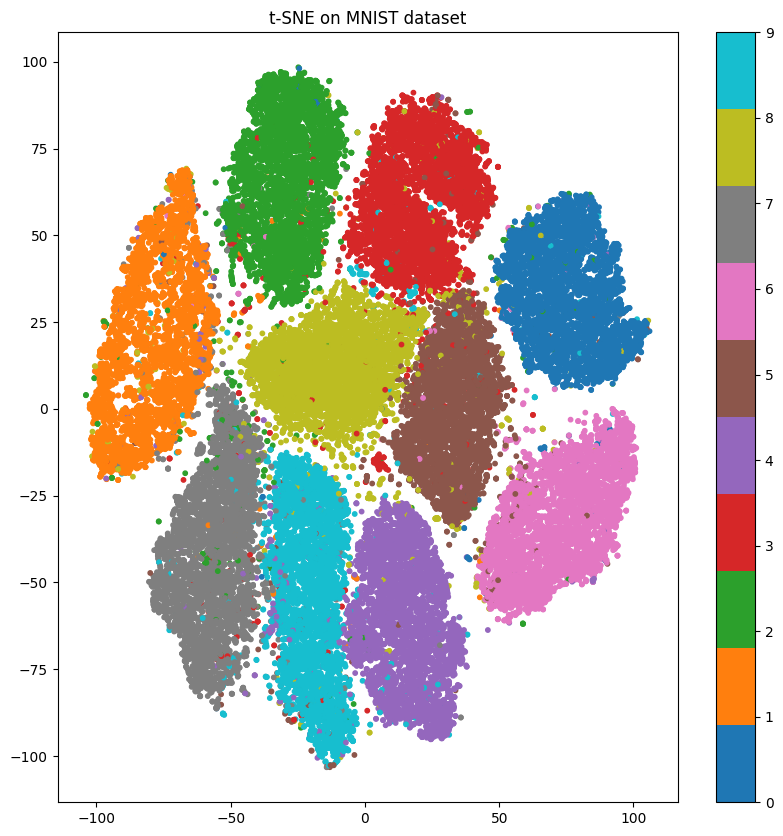

In [2]:
# Q1. a) MNIST dataset


# Load the MNIST dataset
mnist_data = datasets.MNIST(root='./data', train = True, download=True, transform=transforms.ToTensor())

# Perform t-SNE on the MNIST dataset
X = mnist_data.data.numpy().reshape(-1, 28*28)
y = mnist_data.targets.numpy()
X_embedded = TSNE(n_components=2).fit_transform(X)

# Plot the t-SNE results (color for each label)
plt.figure(figsize=(10, 10))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, cmap='tab10', s=10)
plt.colorbar()
plt.title('t-SNE on MNIST dataset')
plt.show()

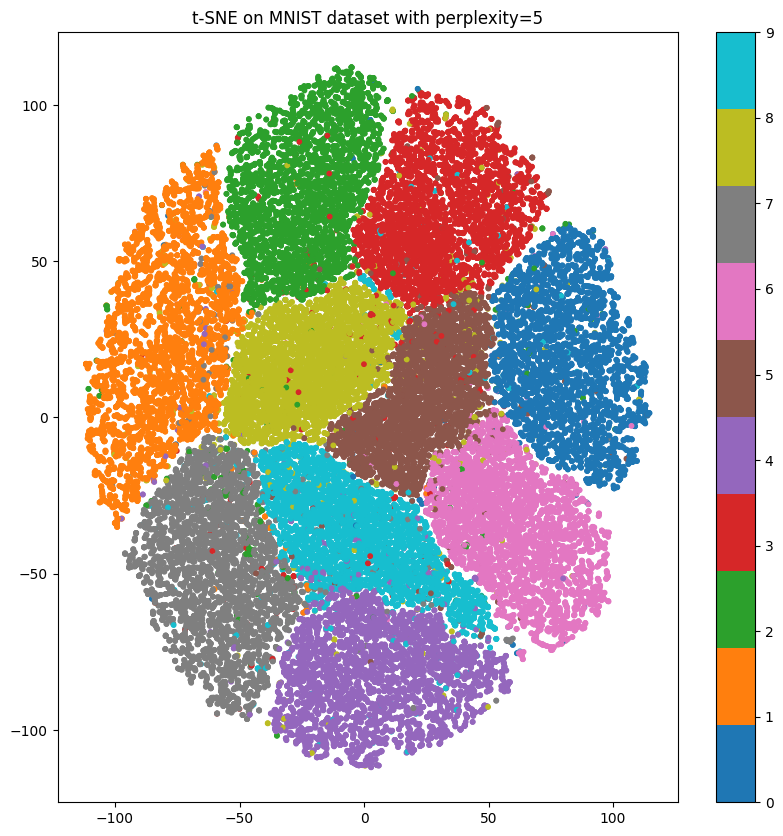

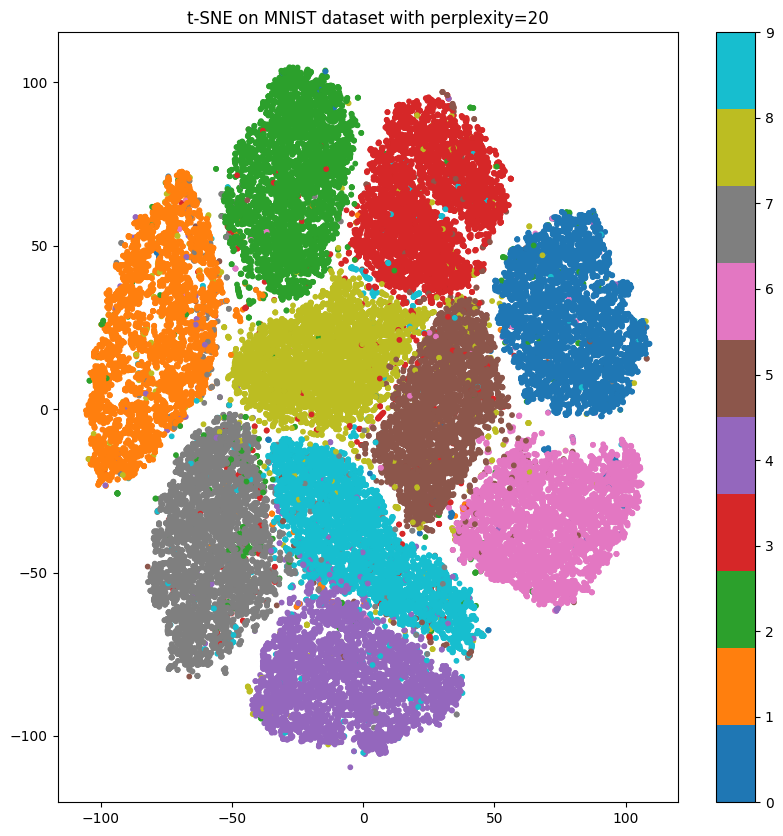

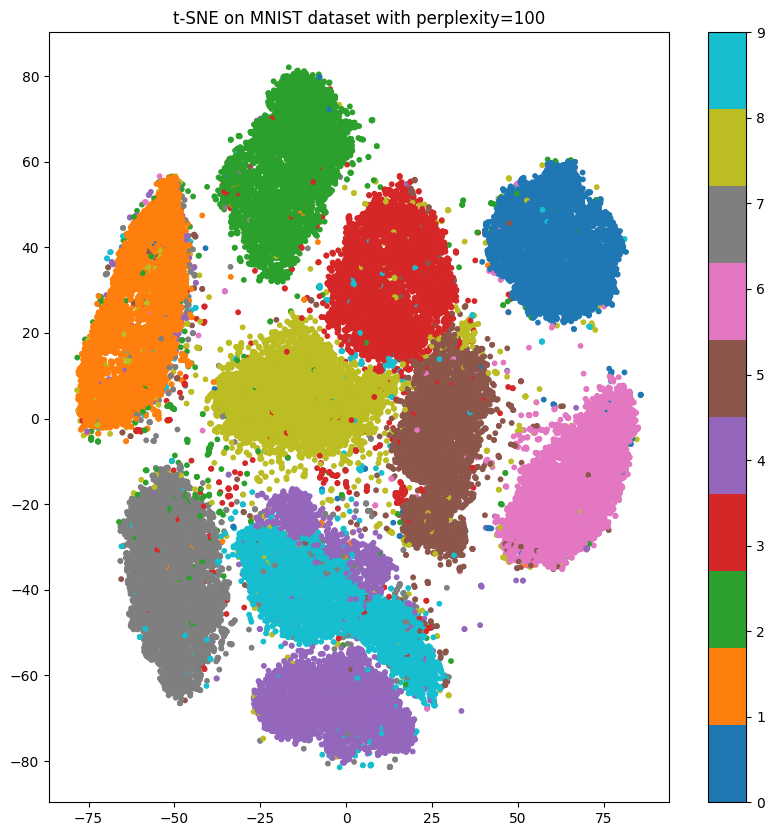

In [4]:
# Perform different Perplexities:
perplexities = [5,20, 100]

for perplexity in perplexities:
    X_embedded = TSNE(n_components=2, perplexity=perplexity).fit_transform(X)
    plt.figure(figsize=(10, 10))
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, cmap='tab10', s=10)
    plt.colorbar()
    plt.title(f't-SNE on MNIST dataset with perplexity={perplexity}')
    plt.show()



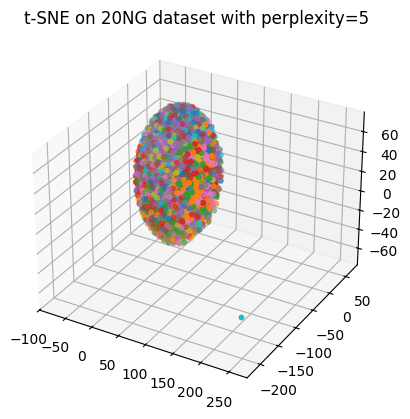

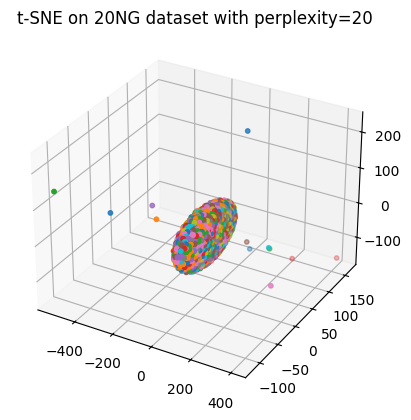

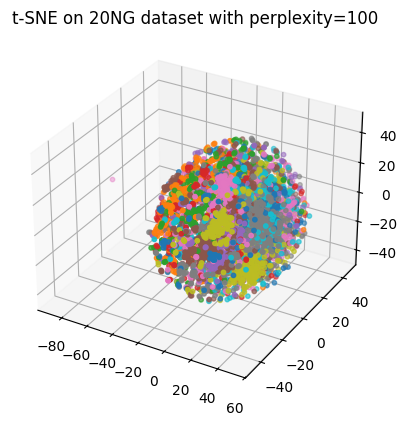

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Q1. a) 20NG dataset
ng_data = _twenty_newsgroups.fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))

# Convert text data to numerical features using TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000)  # Limit features for better performance
X = vectorizer.fit_transform(ng_data.data).toarray()
y = ng_data.target

# Perform t-SNE on the 20NG dataset
for perplexity in perplexities:
    X_embedded = TSNE(n_components=3, perplexity=perplexity).fit_transform(X)
    # plot in 3d
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_embedded[:, 0], X_embedded[:, 1], X_embedded[:, 2], c=y, cmap='tab10', s=10)
    plt.title(f't-SNE on 20NG dataset with perplexity={perplexity}')
    plt.show()

    

In [11]:
# Q1. b) DBSCAN clustering
# Perform DBSCAN clustering on the MNIST dataset of G = 2,3,5 dimensions. 
# Check confusion matrix with TSNE into 3 dimensions
# DBSCAN parameters (eps=9.75, minpts=33)

# Perform t-SNE on the MNIST dataset
X = mnist_data.data.numpy().reshape(-1, 28*28)
y = mnist_data.targets.numpy()
X_embedded = TSNE(n_components=3).fit_transform(X)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=9.75, min_samples=33)
y_dbscan = dbscan.fit_predict(X_embedded)

# Plot the t-SNE results (color for each label)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_embedded[:, 0], X_embedded[:, 1], X_embedded[:, 2], c=y_dbscan, cmap='tab10', s=10)
plt.title('DBSCAN on MNIST dataset')
plt.show()



KeyboardInterrupt: 